In [1]:
from sympy import *
from math import e
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np

# Funcion a optimizar


$$max f(x) = \frac{0.5}{\sqrt{1+x^2}} - \sqrt{1+x^2}(1-\frac{0.5}{1+x^2}) + x$$

## Obtenemos la primer y segunda derivada

In [2]:
x = Symbol('x')

formule = '(0.5/sqrt(1+x^2)) - ( sqrt(1+x^2) * (1 - (0.5/(1+x^2))) ) + x'

y = sympify(formule)
df = y.diff(x)
ddf = df.diff(x)

print(df)
print('\n',ddf)

-x*(1 - 0.5/(x**2 + 1))/sqrt(x**2 + 1) - 1.5*x/(x**2 + 1)**(3/2) + 1

 x**2*(1 - 0.5/(x**2 + 1))/(x**2 + 1)**(3/2) + 3.5*x**2/(x**2 + 1)**(5/2) - (1 - 0.5/(x**2 + 1))/sqrt(x**2 + 1) - 1.5/(x**2 + 1)**(3/2)


In [3]:
def f(x,contador):
  a= 0.5/sqrt(1+x**2)
  b=sqrt(1+x**2)
  c=1-(0.5/(1+x**2))

  return -(a-(b*c)+x) , contador+1

def df(x,contador):
  return -(-x*(1 - 0.5/(x**2 + 1))/sqrt(x**2 + 1) - 1.5*x/(x**2 + 1)**(3/2) + 1) , contador+1
          
def ddf(x,contador):
  return -(x**2*(1 - 0.5/(x**2 + 1))/(x**2 + 1)**(3/2) + 3.5*x**2/(x**2 + 1)**(5/2) - (1 - 0.5/(x**2 + 1))/sqrt(x**2 + 1) - 1.5/(x**2 + 1)**(3/2)) , contador+1

# Implementaciones

## Método de las estimaciones cuadráticas sucesivas 

In [4]:
def q(x1,x2,x3,f1,f2,f3):
    a0 = f1
    a1 = (f2-f1)/(x2-x1)
    a2 = (1/(x3-x2)) * ( ((f3-f1)/(x3-x1)) - ((f2-f1)/(x2-x1)) )
    
    xd = ((x1+x2)/2) - (a1/(2*a2))
    
    return xd
    
    

contador=0
x1,delta,epsilon=[0,0.1,0.0001]
x2 = x1+delta

f1,contador = f(x1,contador)
f2,contador = f(x2,contador)

if f1 > f2:
    x3 = x1+(2*delta)
else:
    x3 = x1 - delta
    
f3,contador = f(x3,contador)



aux1,aux2,aux3=sorted([[x1,f1],[x2,f2],[x3,f3]], key=lambda x:x[1])

x1,f1 = aux1
x2,f2 = aux2
x3,f3 = aux3


#f_min=min([f1,f2,f3])
x_min=x1
xb=q(x1,x2,x3,f1,f2,f3)


while abs(x_min - xb) > epsilon:

    x_min=x1
    xb=q(x1,x2,x3,f1,f2,f3)
    
    fb,contador=f(xb,contador)
    
    aux1,aux2,aux3,discard=sorted([[x1,f1],[x2,f2],[x3,f3],[xb,fb]], key=lambda x:x[1])

    x1,f1 = aux1
    x2,f2 = aux2
    x3,f3 = aux3
    

xb="{0:.3f}".format(xb)
fb="{0:.3f}".format(-fb)

print(f'({xb}, {fb})')
print(contador)


(0.786, 0.300)
12


## Método de Newton - Raphson 

In [5]:

x1,epsilon=[0,0.0001]

k=0
xs=[x1]


contadorf=0
f_c,contadorf=df(xs[k],contadorf)
xs.append(xs[k] - ( f_c / (ddf(xs[k],0)[0]) ))

while abs(f_c)>epsilon:

    f_c,contadorf=df(xs[k+1],contadorf)
    xs.append(xs[k+1] - ( f_c / (ddf(xs[k+1],0)[0]) ))

    k+=1


a="{0:.3f}".format(xs[-1])
b="{0:.3f}".format(-f(xs[-1],0)[0])
print(f'({a},{b})')
    
print(contadorf)

(0.786,0.300)
6


## Método de Cuasi-Newton 

In [6]:
def fcn(x):
    global contadorfc
    contadorfc+=1
    a= 0.5/sqrt(1+x**2)
    b=sqrt(1+x**2)
    c=1-(0.5/(1+x**2))

    return -(a-(b*c)+x)


def f1cn(x,delta):
    fxpd=fcn(x+delta)
    fxld=fcn(x-delta)
    
    a= fxpd - fxld 
    f_res=a/(2*delta)
    return f_res,fxpd,fxld

def f2cn(x,delta,fxpd,fxld):
    ff=fcn(x)
    a=fxpd - 2*ff + fxld
    b=delta**2
    

    return (a/b , ff)
    

x1,epsilon,delta=[0,0.0001,0.01]

k=0
xs=[x1]


contadorfc=0

f_c,fxpd,fxld = f1cn(xs[k],delta)    
f_c2,ff=f2cn(xs[k], delta, fxpd, fxld)

xs.append(xs[k] - ( f_c / f_c2 ))

while abs(f_c)>epsilon:
    f_c,fxpd,fxld = f1cn(xs[k+1],delta)
    
    f_c2,ff = f2cn(xs[k+1], delta, fxpd, fxld)
    
    xs.append(xs[k+1] - ( f_c / f_c2 ))

    k+=1


a="{0:.3f}".format(xs[-1])
b="{0:.3f}".format(-ff)
print(f'({a},{b})')
print(contadorfc)

(0.786,0.300)
18


## Método de Bisección


In [7]:

a,b,epsilon=[0,5,0.0001]

contador=2
if (df(a,0)[0] <= 0) and (df(b,0)[0] >= 0):
    while True:
        z=(a+b)/2
        fc,contador=df(z,contador)
        #if abs(fc) > epsilon:
        if fc < 0:
            a = z
        else:
            b = z
            
        if not abs(fc) > epsilon:
            break
      
    
    a="{0:.3f}".format(z)
    b="{0:.3f}".format(-f(z,0)[0])
    print(f'({a},{b})')

    print(contador)
        
else:
    print('Error')

(0.786,0.300)
12


## Método de la Secante

In [8]:

L,R,epsilon=[0,5,0.0001]

contador=0
first=True

fr,contador=df(R,contador)
fl,contador=df(L,contador)

if fl*fr >= 0:
  print('Error')

else:
    z=R-( (fr*(R-L)) / (fr-fl) )
    fz,contador=df(z,contador)
    while abs(fz)>epsilon:    

        if fz < 0:
            L=z
            fl=fz

        else:
            R=z
            fr=fz

        z=R-( (fr*(R-L)) / (fr-fl) )
        fz,contador=df(z,contador)

    a="{0:.3f}".format(z)
    b="{0:.3f}".format(-f(z,0)[0])
    print(f'({a},{b})')
    print(contador)
    


(0.786,0.300)
56


# Graficacion

In [9]:
x = np.arange(0.786-1,0.786+1,0.1)
y = [-f(i,0)[0] for i in x]
z = [f(i,0)[0] for i in x]

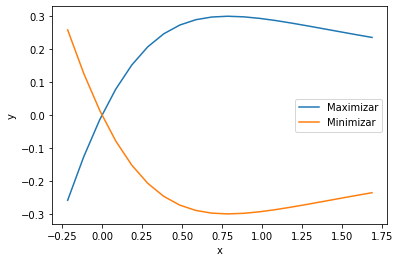

In [10]:
plt.plot(x,y,label='Maximizar')
plt.plot(x,z,label='Minimizar')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#3.

$$min: g(x) = e^x - x^3$$

In [11]:
x = Symbol('x')
formule = '(e^x)-(x^3)'

y = sympify(formule)
df = y.diff(x)
ddf = df.diff(x)

print(df)
print('\n',ddf)

e**x*log(e) - 3*x**2

 e**x*log(e)**2 - 6*x


In [12]:

def g(x,contador):
  return (e**x) - x**3 ,contador+1

def dg(x,contador):
  return (e**x)*log(e) - 3*x**2, contador+1

def ddg(x,contador):
  return e**x*log(e)**2 - 6*x ,contador+1

## Graficamos para determinar nuestro espacio de busqueda

In [13]:
x = np.arange(-2,5,0.01)
y = [g(i,0)[0] for i in x]

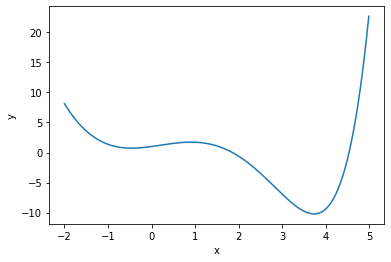

In [14]:
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
# plt.legend()
plt.show()

## Método de Bisección


In [15]:

a,b,epsilon=[-5,5,0.0001]

contador=2
if (dg(a,0)[0] <= 0) and (dg(b,0)[0] >= 0):
    while True:
        z=(a+b)/2
        fc,contador=dg(z,contador)
        #if abs(fc) > epsilon:
        if fc < 0:
            a = z
        else:
            b = z
            
        if not abs(fc) > epsilon:
            break
      
    
    a="{0:.3f}".format(z)
    b="{0:.3f}".format(g(z,0)[0])
    print(f'({a},{b})')

        
    print(contador)
        
else:
    print('Error')

(-0.459,0.729)
12


In [16]:

a,b,epsilon=[1,5,0.0001]

contador=2
if (dg(a,0)[0] <= 0) and (dg(b,0)[0] >= 0):
    while True:
        z=(a+b)/2
        fc,contador=dg(z,contador)
        if fc < 0:
            a = z
        else:
            b = z
            
        if not abs(fc) > epsilon:
            break
    
    a="{0:.3f}".format(z)
    b="{0:.3f}".format(g(z,0)[0])
    print(f'({a},{b})')

    print(contador)
        
else:
    print('Error')

(3.733,-10.216)
20


Como se ve en los resultados anteriores dependiendo de nuestro espacio de busqueda nos daran minimos diferentes que se ven en la siguiente grafica

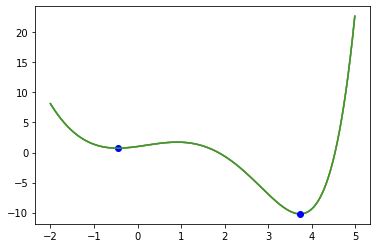

In [17]:
x = np.arange(-2,5,0.01)
y = [g(i,0)[0] for i in x]

plt.plot(x, y)

plt.plot(x,y, -0.459,0.729, "bo")
plt.plot(x,y, 3.733, -10.216, "bo")
plt.show()